In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import plotly.express as px
!pip install Faker
from faker import Faker
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
from pandas_profiling import ProfileReport
from IPython.display import clear_output
!pip install wikipedia
import wikipedia as wp
import re
clear_output()

#Loading the data

In [3]:
dfSinistres = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Sinistres.csv',sep='|' , encoding = "utf-16")
dfSinistres.head(3)

,CodeSinistre_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,dateOuvertureDuSinistre,lieuDuSinistre,pourcentadeDeResponsabilite,natureDuSinistre,Calculer_Sinistre
0,1,174550,38693,144558,2017-05-29,NaN,100,M,False
1,2,174557,166073,144565,2017-12-18,NaN,100,M,False
2,3,174557,166073,144565,2018-02-16,NaN,100,M,False


In [4]:
dfSinistresComplement = pd.read_csv('C:/Users/Meriem/Downloads/CGA/complement/Sinistre.csv',sep=';')
dfSinistresComplement.head(3)

C:\Users\Meriem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (12,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,sinistre_id,cga_police_id,cga_vehicule_id,cga_assure_id,date,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,lieuDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre
0,2,174557,166073,144565,NaN,S170155501,2017-12-18,0,2017-12-18,NaN,NaN,0,834736,11.0,0,1651TU133,TU,2,M,1
1,3,174557,166073,144565,NaN,S180017071,2018-02-16,0,2018-02-16,NaN,NaN,0,NaN,1.0,0,7046TU163,TU,2,M,1
2,4,174560,17936,119709,NaN,S170032921,2017-03-11,0,2017-03-27,NaN,NaN,100,010204000027,4.0,0,3626TU159,TU,3,M,1


In [5]:
dfPolice = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Police.csv', encoding = "utf-16")
dfPolice.head(3)

C:\Users\Meriem\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice
0,545568,1,599,1,20155.0076050/6,R,I,R,2015-10-13,1013.0
1,545569,1,655,1,20155.0076056/5,R,I,V,2015-10-13,1013.0
2,545570,1,757,1,20155.0076058/9,R,I,V,2015-10-13,1013.0


In [6]:
dfClassesBonusMalus = pd.read_csv('C:/Users/Meriem/Downloads/CGA/ClassesBonusMalus.csv')
dfClassesBonusMalus.head(3)

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
0,117346,116167,111858,101772,101691,1,V,2017-07-14 00:00:00.000000,1,1,70
1,117347,116168,111859,99417,99336,10,V,2017-07-14 00:00:00.000000,1,1,80
2,117348,116169,111860,101773,101692,1,V,2017-07-14 00:00:00.000000,1,1,70


In [7]:
dfAssurre = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Assure.csv')
dfAssurre.head(3)

,CodeAssure_id
0,753885
1,753886
2,753887


In [8]:
dfCompagnies = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Compagnies.csv')
dfCompagnies.head(3)

,CODE_COMPAGNIE_id,CODE_COMPAGNIE
0,18,1
1,19,2
2,20,3


In [9]:
dfVehicule= pd.read_csv('C:/Users/Meriem/Downloads/CGA/Vehicule.csv')
dfVehicule.head(3)

,CodeVehicule_id,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion
0,696264,152,5,TU,ESSENCE,2017-10-05
1,696265,107,4,TU,ESSENCE,2017-10-05
2,696266,808,5,TU,ESSENCE,2017-10-05


# **Exploratory data analysis** (EDA)

#Reports

In [10]:
#ProfiledfClassesBonusMalus = ProfileReport(dfClassesBonusMalus, title='Bonus Malus Report')
#ProfiledfClassesBonusMalus.to_file(output_file="ClassesBonusMalus.html")

In [11]:
#ProfiledfVehicule= ProfileReport(dfVehicule, title='Vehicule Report')
#ProfiledfVehicule.to_file(output_file="Vehicule.html")

In [12]:
#ProfiledfPolice = ProfileReport(dfPolice, title='Police Report')
#ProfiledfPolice.to_file(output_file="ProfileReport.html")

In [13]:
#profile_dfSinistres = ProfileReport(dfSinistres, title='Sinistres Report')
#profile_dfSinistres.to_file(output_file="profile Sinistres.html")

In [14]:
#profile_dfSinistresComplement = ProfileReport(dfSinistresComplement, title='SinistresComplement Report')
#profile_dfSinistresComplement.to_file(output_file="profile Sinistres Complement.html")

#Table CGA Police

In [15]:
dfPolice.head(5)

,CodePolice_id,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,dateEcheancePolice
0,545568,1,599,1,20155.0076050/6,R,I,R,2015-10-13,1013.0
1,545569,1,655,1,20155.0076056/5,R,I,V,2015-10-13,1013.0
2,545570,1,757,1,20155.0076058/9,R,I,V,2015-10-13,1013.0
3,545571,1,636,1,20155.0076059/4,R,I,V,2015-10-13,1013.0
4,545572,1,610,1,20155.0076062/9,R,I,V,2015-10-13,1013.0


In [16]:
dfPolice.drop(['dateEcheancePolice'], axis=1, inplace=True)

In [17]:
dfPolice.isnull().sum()

CodePolice_id        0
codeCompagnie        0
codeAgence           0
typeIntermediaire    0
numPolice            0
naturePolice         0
typePolice           0
Etat_Police          0
dateEffetPolice      0
dtype: int64

#Table CGA Sinistre

dfSinistresComplement present 560935 rows and dfSinistres present just 24332 also we have 21819 unique values in columns that describe the place of sinitres which is very important to us, so we desided to work with the complement table.

We have many columns with high percentage of  missing values.  
*   date has 560935 (100.0%) missing values ==> **will be deleted**
*   lieuDuSinistre has 345887 (61.7%) missing values 
* identificationTiers has 345512 (61.6%) missing values 
*   numeroDePoliceCompagnieAdverse has 355789 (63.4%) missing values 
*   codeCompagnieAdverse has 278283 (49.6%) missing values 
*   numeroImmatriculationVehiculeAdverse has 340562 (60.7%) missing values 
*   typeImmatriculationVehiculeAdverse has 334281 (59.6%) missing values 

In [18]:
#from sklearn.impute import SimpleImputer
#imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

In [19]:
#dfSinistresComplement_imp=imp.fit_transform(dfSinistresComplement)

In [20]:
dfSinistresComplement[dfSinistresComplement['numeroDePoliceCompagnieAdverse'].isin(dfPolice["numPolice"]) == True].shape

(64178, 20)

In [21]:
dfSinistresComplement[dfSinistresComplement['codeCompagnieAdverse'].isin(dfCompagnies["CODE_COMPAGNIE"]) == True].shape

(263515, 20)

In [22]:
dfSinistresComplement[dfSinistresComplement['typeImmatriculationVehiculeAdverse'].isin(dfVehicule["typeImmatriculation"]) == True].shape

(222227, 20)

numeroDePoliceCompagnieAdverse : 355789 missing values  ==> 64178 already exists  
codeCompagnieAdverse has 278283 (49.6%) missing values  ==> 263515 already   exists  
typeImmatriculationVehiculeAdverse has 334281 (59.6%) missing values == > 222227 already exists  

In [23]:
#dfSinistresComplement.drop(['numeroDePoliceCompagnieAdverse','codeCompagnieAdverse',
#                            'numeroImmatriculationVehiculeAdverse','typeImmatriculationVehiculeAdverse','identificationTiers'], axis=1, inplace=True)

In [24]:
dfSinistresComplement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560935 entries, 0 to 560934
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   sinistre_id                           560935 non-null  int64  
 1   cga_police_id                         560935 non-null  int64  
 2   cga_vehicule_id                       560935 non-null  int64  
 3   cga_assure_id                         560935 non-null  int64  
 4   date                                  0 non-null       float64
 5   numeroDuSinistre                      560935 non-null  object 
 6   dateDeSurvenanceDuSinistre            560935 non-null  object 
 7   heureSurvanceDusinistre               560935 non-null  int64  
 8   dateOuvertureDuSinistre               560935 non-null  object 
 9   lieuDuSinistre                        215048 non-null  object 
 10  identificationTiers                   215423 non-null  object 
 11  

In [25]:
dfSinistresComplement.drop(['date'], axis=1, inplace=True)

In [26]:
df1 = dfSinistresComplement[['sinistre_id','lieuDuSinistre']]
df1.dropna(inplace=True)
def clean_text(text):
  text = text.lower()
  words = text.split()
  text = " ".join(sorted(set(words), key=words.index))
  text = text +' tunisie'
  return text
function = lambda x: clean_text(x)
df1.lieuDuSinistre = pd.DataFrame(df1.lieuDuSinistre.apply(function))
df1

<ipython-input-26-4325311512f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)
C:\Users\Meriem\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,sinistre_id,lieuDuSinistre
11705,12356,sfax tunisie
11706,12357,menzah tunisie
11707,12358,sfax tunisie
11708,12359,sfax tunisie
11709,12360,route de sidi salem tunisie
...,...,...
560844,737481,sousse tunisie
560845,737482,sousse tunisie
560846,737483,tunis tunisie
560847,737484,ariana tunisie


In [27]:
dfSinistresComplement.drop(['lieuDuSinistre'], axis=1, inplace=True)
dfSinistresComplement = dfSinistresComplement.merge(df1, how='left', left_on='sinistre_id', right_on='sinistre_id')
dfSinistresComplement

,sinistre_id,cga_police_id,cga_vehicule_id,cga_assure_id,numeroDuSinistre,dateDeSurvenanceDuSinistre,heureSurvanceDusinistre,dateOuvertureDuSinistre,identificationTiers,pourcentadeDeResponsabilite,numeroDePoliceCompagnieAdverse,codeCompagnieAdverse,porcentageCompagnieAdverse,numeroImmatriculationVehiculeAdverse,typeImmatriculationVehiculeAdverse,mouvementDusinistre,natureDuSinistre,Calculer_Sinistre,lieuDuSinistre
0,2,174557,166073,144565,S170155501,2017-12-18,0,2017-12-18,NaN,0,834736,11.0,0,1651TU133,TU,2,M,1,NaN
1,3,174557,166073,144565,S180017071,2018-02-16,0,2018-02-16,NaN,0,NaN,1.0,0,7046TU163,TU,2,M,1,NaN
2,4,174560,17936,119709,S170032921,2017-03-11,0,2017-03-27,NaN,100,010204000027,4.0,0,3626TU159,TU,3,M,1,NaN
3,5,174573,17192,144580,S170144161,2017-11-23,0,2017-11-27,NaN,0,0101160000565,4.0,0,8312TU163,TU,3,M,1,NaN
4,6,174581,166084,135912,S170022571,2017-02-23,0,2017-03-02,NaN,0,20075.0336001/3,1.0,0,9213TU96,TU,3,M,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560930,737567,3249956,455778,433464,SIN/1142/2019,2019-06-29,0,2019-09-19,NaN,0,NaN,NaN,0,NaN,NaN,3,M,0,NaN
560931,737568,3238400,345062,489207,SIN/587/2019,2018-10-02,0,2019-09-10,NaN,100,NaN,NaN,0,NaN,NaN,3,M,0,NaN
560932,737569,2833155,1109469,1076895,815545,2019-05-14,0,2019-07-08,NaN,100,NaN,NaN,0,NaN,NaN,3,M,0,NaN
560933,737570,3240382,540272,511911,SIN/1186/2019,2018-11-10,0,2019-09-20,NaN,100,NaN,NaN,0,NaN,NaN,3,C,0,NaN


In [28]:
dfSinistresComplement.replace(np.nan,'Not mentioned',inplace=True)

In [29]:
dfSinistresComplement['dateOuvertureDuSinistre'] = pd.to_datetime(dfSinistresComplement['dateOuvertureDuSinistre'], format='%Y-%m-%d')

In [30]:
dfWeather = pd.read_csv('C:/Users/Meriem/Downloads/CGA/Weather.csv')
dfWeather

,Unnamed: 0,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,0,"نابل, تونس",01/02/2017,60.1,41.5,48.9,39.9,NaN,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain
1,1,"نابل, تونس",01/03/2017,62.1,41.5,50.8,38.1,NaN,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain
2,2,"نابل, تونس",01/04/2017,61.5,50.2,54.8,NaN,NaN,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy
3,3,"نابل, تونس",01/05/2017,61.1,50.4,55.2,NaN,NaN,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy"
4,4,"نابل, تونس",01/06/2017,51.9,44.5,48.4,38.9,NaN,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,87,"نابل, تونس",12/28/2017,55.7,48.3,51.9,45.7,NaN,0.25,0,0,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy"
453,88,"نابل, تونس",12/29/2017,59.8,49.8,54.4,45.3,NaN,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy"
454,89,"نابل, تونس",12/30/2017,67.0,48.5,58.3,46.0,NaN,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain
455,90,"نابل, تونس",12/31/2017,71.3,50.4,60.0,NaN,NaN,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear


In [31]:
dfWeather.drop(['Unnamed: 0', 'Name'], axis=1, inplace=True)

In [32]:
dfWeather['Date time'] = pd.to_datetime(dfWeather['Date time'], format='%m/%d/%Y')

In [33]:
dfSinistreRecord = dfSinistresComplement.groupby(dfSinistresComplement.dateOuvertureDuSinistre.tolist()).size().reset_index().rename(columns={0:'records'})

In [34]:
dfSinistreRecord

,index,records
0,1995-06-02,1
1,1999-08-23,1
2,2003-10-23,1
3,2004-11-03,1
4,2006-02-17,1
...,...,...
1923,2019-09-25,596
1924,2019-09-26,681
1925,2019-09-27,686
1926,2019-09-28,98


In [35]:
dfSinistresComplement.dateOuvertureDuSinistre

0        2017-12-18
1        2018-02-16
2        2017-03-27
3        2017-11-27
4        2017-03-02
            ...    
560930   2019-09-19
560931   2019-09-10
560932   2019-07-08
560933   2019-09-20
560934   2019-09-24
Name: dateOuvertureDuSinistre, Length: 560935, dtype: datetime64[ns]

In [36]:
dfSinistresEtWeather = pd.merge(dfWeather,dfSinistreRecord ,how="left", left_on="Date time",right_on="index")

In [37]:
dfSinistresEtWeather

,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions,index,records
0,2017-01-02,60.1,41.5,48.9,39.9,NaN,0.01,0,0,5.3,193.00,9.2,5.7,16.1,71.15,Rain,2017-01-02,173.0
1,2017-01-03,62.1,41.5,50.8,38.1,NaN,0.01,0,0,8.2,228.67,18.3,5.6,15.9,67.23,Rain,2017-01-03,205.0
2,2017-01-04,61.5,50.2,54.8,NaN,NaN,0.00,0,0,15.3,249.67,28.9,6.0,33.9,69.17,Partially cloudy,2017-01-04,193.0
3,2017-01-05,61.1,50.4,55.2,NaN,NaN,0.01,0,0,27.4,271.96,53.0,6.1,32.0,65.06,"Rain, Partially cloudy",2017-01-05,162.0
4,2017-01-06,51.9,44.5,48.4,38.9,NaN,0.20,0,0,23.8,318.46,36.9,6.1,33.5,56.17,"Rain, Partially cloudy",2017-01-06,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,2017-12-28,55.7,48.3,51.9,45.7,NaN,0.25,0,0,13.6,247.33,34.4,5.9,27.0,77.25,"Rain, Partially cloudy",2017-12-28,762.0
453,2017-12-29,59.8,49.8,54.4,45.3,NaN,0.17,0,0,26.3,285.67,48.3,5.8,25.5,72.03,"Rain, Partially cloudy",2017-12-29,905.0
454,2017-12-30,67.0,48.5,58.3,46.0,NaN,0.13,0,0,15.3,275.50,33.3,6.2,18.2,74.42,Rain,2017-12-30,153.0
455,2017-12-31,71.3,50.4,60.0,NaN,NaN,0.00,0,0,12.7,232.04,30.0,6.2,7.4,74.32,Clear,2017-12-31,223.0


#Table Assure

In [38]:
fake = Faker()
ligne = dfAssurre.shape[0]
def random_genders(size, p=None):
    """Generate n-length ndarray of genders."""
    if not p:
        # default probabilities
        p = (0.5, 0.5)
    gender = ("M", "F")
    return np.random.choice(gender, size=size, p=p)
dfAssurre['Gender']= random_genders(ligne , p=None)

In [39]:
html = wp.page("List_of_cities_in_Tunisia").html().encode("UTF-16")
dfCityFr = pd.read_html(html)[1] 
def clean_text(text):
    text = text.lower() 
    text = re.sub('la ', '', text)
    text = re.sub('le ', '', text)
    text = re.sub('el ', '', text)
    #text = re.sub('é', 'e', text)
    #text = re.sub('è', 'e', text)
    return text

function = lambda x: clean_text(x)
dfCityFr.Municipality = pd.DataFrame(dfCityFr.Municipality.apply(function))
dfCityFr.Governorate = pd.DataFrame(dfCityFr.Governorate.apply(function))
dfCityFr.columns =['Governorate','Code','Municipality','Population']
dfCityFr

,Governorate,Code,Municipality,Population
0,tunis,1111,tunis,638845
1,tunis,1112,bardo,71961
2,tunis,1113,kram,74132
3,tunis,1114,goulette,45711
4,tunis,1115,carthage,17010
...,...,...,...,...
259,kebili,6311,kebili,20623
260,kebili,6312,djemna,7194
261,kebili,6313,douz,30245
262,kebili,6314,golâa,7912


In [40]:
gouvernorats = list(dfCityFr.Governorate.unique())
sumPop = sum(dfCityFr.Population)
pourcentageGov = [ (dfCityFr[dfCityFr.Governorate == e ].Population.unique().sum())/sumPop for e in gouvernorats ]
listGov = np.random.choice(gouvernorats,size=ligne,p=pourcentageGov)

In [41]:
dfAssurre['Gouvernorat'] = listGov
dfAssurre['Municipalité'] = listGov

In [42]:
for gov in gouvernorats:
  v = dfAssurre['Municipalité'].values == gov
  citiesInMunicipality = list(dfCityFr[dfCityFr.Governorate == gov ].Municipality)
  dfAssurre.loc[v, 'Municipalité'] = np.random.choice(citiesInMunicipality, v.sum())

In [43]:
dfAssurre['Age'] = np.random.randint(18, 80, size=ligne)

In [44]:
dfAssurre.Gouvernorat = dfAssurre.Gouvernorat+" Tunisia"

In [45]:
dfAssurre.head()

,CodeAssure_id,Gender,Gouvernorat,Municipalité,Age
0,753885,M,sfax Tunisia,hencha,24
1,753886,F,ben arous Tunisia,mourouj,30
2,753887,F,nabeul Tunisia,hammam ghezèze,36
3,753888,F,tunis Tunisia,bardo,33
4,753889,F,gafsa Tunisia,métlaoui,69


#Table CGA Classe Bonus Malus

In [46]:
dfClassesBonusMalus[dfClassesBonusMalus.classeBonusMalusCompagnie != dfClassesBonusMalus.classeBonusMalus]

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus
69321,1304322,1299445,1035931,1009314,1009326,7,V,2016-06-26 00:00:00.000000,4,3,100
97548,1305945,1301068,1037086,1016625,1016638,5,V,2017-07-23 00:00:00.000000,3,1,80
99936,1308333,1303456,645701,1018623,1018636,1,V,2016-10-04 00:00:00.000000,5,4,100
124723,1314216,1309339,502390,1023724,1023737,1,V,2016-09-16 00:00:00.000000,6,5,120
125715,1314332,1309455,1041811,1023469,1023482,5,V,2016-05-01 00:00:00.000000,3,2,90
...,...,...,...,...,...,...,...,...,...,...,...
1264727,1288639,1283847,1025673,1003580,1003592,6,V,2017-01-24 00:00:00.000000,4,3,100
1265518,1289430,1284638,1026295,1005898,1005910,1,V,2016-04-04 00:00:00.000000,3,2,80
1266354,1290266,1285474,466602,1006635,1006647,1,V,2016-07-20 00:00:00.000000,10,8,200
1268268,1292180,1287388,1028540,1008257,1008269,1,V,2016-02-27 00:00:00.000000,6,4,100


# **Save Data**

In [47]:
#dfClassesBonusMalus.to_csv('/content/drive/MyDrive/dataset/DataBaseCGA/CleanedData/dfClassesBonusMalus_Cleaned.csv',index=False)
#dfAssurre.to_csv('dfAssurre_Cleaned.csv',index=False,encoding='utf-16')
#dfSinistresComplement.to_csv('dfSinistre_Cleaned.csv',index=False)

#dfSinistresEtWeather.to_csv('/content/drive/MyDrive/dataset/DataBaseCGA/CleanedData/dfSinistresEtWeather_Cleaned.csv',index=False)
#dfPolice.to_csv('/content/drive/MyDrive/dataset/DataBaseCGA/CleanedData/dfPolice_Cleaned.csv',index=False)

In [48]:
dfMarqueVehicule = pd.read_csv('C:/Users/Meriem/Downloads/CGA/MarqueVehicule.csv')

In [49]:
dfUsageVehicule = pd.read_csv('C:/Users/Meriem/Downloads/CGA/UsageVehicule.csv', encoding = "latin-1")


#Merge Bonus Malus & (Police + Vehicule + Marque Vehicule)

Merge Table Vehicule and MarqueVehicule

In [50]:
#dfVehiculeMergeMarque = dfVehicule.merge(dfMarqueVehicule, how='left', left_on='codeMarque', right_on='Code')

In [51]:
#dfVehiculeMergeMarque.drop(['codeMarque','Code'],axis=1,inplace=True)

In [52]:
#len(dfVehiculeMergeMarque.Marque.unique())

Merge Tables dfClassesBonusMalus and dfUsageVehicule


In [53]:
dfClassesBonusMalusMergeVehicule = dfClassesBonusMalus.merge(dfVehicule, how='left',on='CodeVehicule_id')

In [54]:
dfClassesBonusMalusMergeVehicule.head(3)

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion
0,117346,116167,111858,101772,101691,1,V,2017-07-14 00:00:00.000000,1,1,70,29,6,TU,ESSENCE,2017-10-05
1,117347,116168,111859,99417,99336,10,V,2017-07-14 00:00:00.000000,1,1,80,1672,33,ES,GASOIL,2017-10-05
2,117348,116169,111860,101773,101692,1,V,2017-07-14 00:00:00.000000,1,1,70,105,5,TU,ESSENCE,2017-10-05


Merge Tables dfClassesBonusMalus and dfPolice

In [55]:
dfClassesBonusMalusMergePolice = dfClassesBonusMalus.merge(dfPolice, how='left',on='CodePolice_id')
dfClassesBonusMalusMergePolice.head(5)

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,coefBonusMalus,codeCompagnie,codeAgence,typeIntermediaire,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice
0,117346,116167,111858,101772,101691,1,V,2017-07-14 00:00:00.000000,1,1,70,12,07A,1,D23692,R,I,V,2017-07-14
1,117347,116168,111859,99417,99336,10,V,2017-07-14 00:00:00.000000,1,1,80,12,20Z,1,D25395,R,I,V,2017-07-14
2,117348,116169,111860,101773,101692,1,V,2017-07-14 00:00:00.000000,1,1,70,12,12W,2,D26696,R,I,V,2017-07-14
3,117349,116170,111861,101774,101693,1,V,2017-07-14 00:00:00.000000,1,1,70,12,12W,2,D26697,R,I,V,2017-07-14
4,117350,116171,111862,101775,101694,1,V,2017-07-14 00:00:00.000000,2,2,80,12,53B,1,D26724,R,I,V,2017-07-14


Bonus Malus Merged

In [56]:
dfClassesBonusMalusMerged = dfClassesBonusMalusMergePolice.merge(dfVehicule, how='left',on='CodeVehicule_id')

In [57]:
dfClassesBonusMalusMerged

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,...,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion
0,117346,116167,111858,101772,101691,1,V,2017-07-14 00:00:00.000000,1,1,...,D23692,R,I,V,2017-07-14,29,6,TU,ESSENCE,2017-10-05
1,117347,116168,111859,99417,99336,10,V,2017-07-14 00:00:00.000000,1,1,...,D25395,R,I,V,2017-07-14,1672,33,ES,GASOIL,2017-10-05
2,117348,116169,111860,101773,101692,1,V,2017-07-14 00:00:00.000000,1,1,...,D26696,R,I,V,2017-07-14,105,5,TU,ESSENCE,2017-10-05
3,117349,116170,111861,101774,101693,1,V,2017-07-14 00:00:00.000000,1,1,...,D26697,R,I,V,2017-07-14,29,4,TU,ESSENCE,2017-10-05
4,117350,116171,111862,101775,101694,1,V,2017-07-14 00:00:00.000000,2,2,...,D26724,R,I,V,2017-07-14,107,6,TU,GASOIL,2017-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307356,1302912,1298035,681961,959384,959395,1,V,2017-08-22 00:00:00.000000,8,8,...,101076009,R,I,V,2017-08-22,152,6,TU,ESSENCE,2017-10-05
1307357,1302913,1298036,685316,1014694,1014707,3,V,2016-12-21 00:00:00.000000,5,5,...,100997290,R,I,R,2016-03-10,96,10,TU,GASOIL,2017-10-05
1307358,1302914,1298037,1010766,1014694,1014707,2,V,2017-05-30 00:00:00.000000,5,5,...,101046691,R,I,R,2017-02-01,119,5,TU,GASOIL,2017-10-05
1307359,1302915,1298038,348083,1014694,1014707,1,V,2017-11-11 00:00:00.000000,5,5,...,101063757,R,I,R,2017-05-31,338,7,TU,ESSENCE,2017-10-30


In [58]:
#dfClassesBonusMalusMerged.drop(['CodePolice_id','CodeVehicule_id',],inplace =True,axis=1)

In [59]:
#dfClassesBonusMalusMerged = dfClassesBonusMalusMerged.merge(dfAssurre, how='left',on='CodeAssure_id')
#dfClassesBonusMalusMerged

#Fraud Detection Bonus Malus

In [60]:
# Assurance flotte automobile concerne les entreprises qui ont une multitude de véhicules à leur actif (typePolice == F)
dfClassesBonusMalusIndiv =dfClassesBonusMalusMerged.where(dfClassesBonusMalusMerged['typePolice'].isin(['I']) ).dropna(how='all')
dfClassesBonusMalusIndivActif =dfClassesBonusMalusIndiv.where(dfClassesBonusMalusIndiv['Etat_Police'] =='V').dropna(how='all')
dfClassesBonusMalusIndivActif["Fraude"]=0

Fraude multi Compagnie 

In [61]:
dfNonFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 0).dropna(how='all')
Vehicule_Police = dfNonFraude[dfNonFraude['CodeVehicule_id'].duplicated(keep=False)]
# On verifie si le code compagne ne se répète pas deux fois pour la meme voiture
Vehicule_Police['diff'] = Vehicule_Police.groupby('CodeVehicule_id')['codeCompagnie'].diff()
# On supprime Nan et 0 dans la colonne diff
Vehicule_Police = Vehicule_Police[Vehicule_Police['diff'] != 0.0 ]
Vehicule_Police = Vehicule_Police.dropna(subset=['diff'])
print("On remarque que {} vehicules possedent plusieurs code agence et leurs contrat est actif".format(Vehicule_Police.shape[0]))

On remarque que 5341 vehicules possedent plusieurs code agence et leurs contrat est actif


<ipython-input-61-17614dabea1b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vehicule_Police['diff'] = Vehicule_Police.groupby('CodeVehicule_id')['codeCompagnie'].diff()


In [62]:
listeFraudeMultiAssurance =Vehicule_Police['CodePolice_id'].values
dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodePolice_id'].isin(listeFraudeMultiAssurance)]=1

<ipython-input-62-976fb6b37728>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodePolice_id'].isin(listeFraudeMultiAssurance)]=1


Assure avec plusieurs vehicule

In [63]:
x = dfClassesBonusMalusIndivActif[['CodeAssure_id','CodeVehicule_id']]
x = x.groupby('CodeAssure_id')[['CodeVehicule_id']].count().sort_values(by='CodeVehicule_id',ascending=False).reset_index()
x.head(10)

,CodeAssure_id,CodeVehicule_id
0,53968.0,4186
1,36330.0,1483
2,36108.0,651
3,53642.0,633
4,45825.0,631
5,46811.0,629
6,53806.0,468
7,53681.0,368
8,5817.0,234
9,71676.0,219


In [64]:
dfNonFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 0).dropna(how='all')
x = dfNonFraude[['CodeAssure_id','CodeVehicule_id']]
x = x.groupby('CodeAssure_id')[['CodeVehicule_id']].count().sort_values(by='CodeVehicule_id',ascending=False).reset_index()
Voiture_plusClients = x.where(x['CodeVehicule_id']>1).dropna(how='all')
listeAssure=Voiture_plusClients['CodeAssure_id'].values
len(listeAssure)

80365

In [65]:
dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodeAssure_id'].isin(listeAssure)]=1

<ipython-input-65-c321ea615c9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodeAssure_id'].isin(listeAssure)]=1


In [66]:
dfClassesBonusMalusIndivActif.Fraude.value_counts()

0    804955
1    211001
Name: Fraude, dtype: int64

#Une vehicule possede plusieurs assure_id avec un contrat en cours


In [67]:
dfNonFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 0).dropna(how='all')
df_duplique = dfNonFraude[dfNonFraude['CodeVehicule_id'].duplicated(keep=False)]
print("Il existe {} voiture_id qui ont plusieurs contrats avec police en cours".format(df_duplique.shape[0]))
listeDuplicatedCars =df_duplique['CodeVehicule_id'].values
dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodeVehicule_id'].isin(listeDuplicatedCars)]=1

Il existe 344 voiture_id qui ont plusieurs contrats avec police en cours


<ipython-input-67-a005b4537b73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfClassesBonusMalusIndivActif.Fraude[dfClassesBonusMalusIndivActif['CodeVehicule_id'].isin(listeDuplicatedCars)]=1


In [68]:
dfClassesBonusMalusIndivActif.Fraude.value_counts()

0    804611
1    211345
Name: Fraude, dtype: int64

<AxesSubplot:>

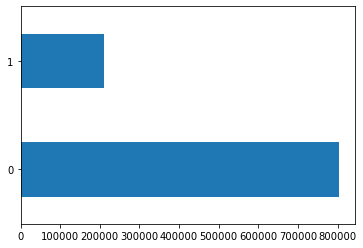

In [69]:
dfClassesBonusMalusIndivActif.Fraude.value_counts()[:20].plot(kind='barh')

C:\Users\Meriem\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fraude', ylabel='count'>

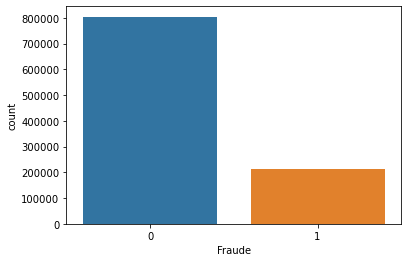

In [70]:
sns.countplot(dfClassesBonusMalusIndivActif['Fraude'])

In [71]:
#dfClassesBonusMalusIndivActif.to_csv('dfClassesBonusMalusIndivActif.csv',index=False,encoding='utf-16')

In [72]:
dfFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 1).dropna(how='all')
dfFraude.drop('Fraude',axis=1,inplace =True)
dfFraude

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,...,numPolice,naturePolice,typePolice,Etat_Police,dateEffetPolice,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion
1,117347.0,116168.0,111859.0,99417.0,99336.0,10.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,D25395,R,I,V,2017-07-14,1672.0,33.0,ES,GASOIL,2017-10-05
4,117350.0,116171.0,111862.0,101775.0,101694.0,1.0,V,2017-07-14 00:00:00.000000,2.0,2.0,...,D26724,R,I,V,2017-07-14,107.0,6.0,TU,GASOIL,2017-10-05
6,117352.0,116173.0,111864.0,58271.0,58262.0,1.0,V,2017-07-14 00:00:00.000000,3.0,3.0,...,D27285,R,I,V,2017-07-14,107.0,5.0,TU,GASOIL,2017-10-05
7,117353.0,116174.0,111865.0,101777.0,101696.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,D27665,R,I,V,2017-07-14,30.0,5.0,TU,GASOIL,2017-10-05
18,117364.0,116185.0,111876.0,101788.0,101707.0,1.0,V,2017-07-14 00:00:00.000000,3.0,3.0,...,D52694,R,I,V,2017-07-14,107.0,9.0,TU,GASOIL,2017-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307313,1302869.0,1297992.0,1035112.0,960579.0,960590.0,1.0,V,2017-01-16 00:00:00.000000,3.0,3.0,...,100989955,R,I,V,2016-01-16,29.0,5.0,TU,GASOIL,2017-10-05
1307329,1302885.0,1298008.0,1035125.0,961774.0,961785.0,2.0,V,2017-02-02 00:00:00.000000,1.0,1.0,...,101046915,R,I,V,2017-02-02,29.0,8.0,TU,GASOIL,2017-10-05
1307331,1302887.0,1298010.0,985301.0,961789.0,961800.0,2.0,V,2017-09-23 00:00:00.000000,5.0,5.0,...,101054008,R,I,V,2017-03-23,30.0,8.0,TU,GASOIL,2017-10-05
1307332,1302888.0,1298011.0,1035127.0,523607.0,523612.0,2.0,V,2017-04-26 00:00:00.000000,5.0,5.0,...,101059060,R,I,V,2017-04-26,29.0,8.0,TU,GASOIL,2017-10-05


In [73]:
dfClassesBonusMalusIndivActif

,CodeBonusMalus_id,CodePolice_id,CodeVehicule_id,CodeAssure_id,CodeSouscripteur_id,codeUsage,ETAT_VEHICULE,DATE_AFFECTATION,classeBonusMalus,classeBonusMalusCompagnie,...,naturePolice,typePolice,Etat_Police,dateEffetPolice,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion,Fraude
0,117346.0,116167.0,111858.0,101772.0,101691.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,R,I,V,2017-07-14,29.0,6.0,TU,ESSENCE,2017-10-05,0
1,117347.0,116168.0,111859.0,99417.0,99336.0,10.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,R,I,V,2017-07-14,1672.0,33.0,ES,GASOIL,2017-10-05,1
2,117348.0,116169.0,111860.0,101773.0,101692.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,R,I,V,2017-07-14,105.0,5.0,TU,ESSENCE,2017-10-05,0
3,117349.0,116170.0,111861.0,101774.0,101693.0,1.0,V,2017-07-14 00:00:00.000000,1.0,1.0,...,R,I,V,2017-07-14,29.0,4.0,TU,ESSENCE,2017-10-05,0
4,117350.0,116171.0,111862.0,101775.0,101694.0,1.0,V,2017-07-14 00:00:00.000000,2.0,2.0,...,R,I,V,2017-07-14,107.0,6.0,TU,GASOIL,2017-10-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307353,1302909.0,1298032.0,1035140.0,959375.0,959386.0,2.0,V,2017-08-26 00:00:00.000000,3.0,3.0,...,R,I,V,2017-08-26,376.0,9.0,TU,GASOIL,2017-10-05,0
1307354,1302910.0,1298033.0,1035141.0,1014692.0,1014705.0,1.0,V,2017-09-29 00:00:00.000000,4.0,4.0,...,R,I,V,2017-09-29,29.0,6.0,TU,ESSENCE,2017-10-05,0
1307355,1302911.0,1298034.0,1035142.0,1014693.0,1014706.0,2.0,V,2017-09-08 00:00:00.000000,5.0,5.0,...,R,I,V,2016-09-08,12.0,5.0,RS,GASOIL,2017-10-05,0
1307356,1302912.0,1298035.0,681961.0,959384.0,959395.0,1.0,V,2017-08-22 00:00:00.000000,8.0,8.0,...,R,I,V,2017-08-22,152.0,6.0,TU,ESSENCE,2017-10-05,0


In [74]:
#dfNonFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 0).dropna(how='all')
dfClassesBonusMalusIndivActif.drop(['typePolice','Etat_Police','ETAT_VEHICULE','coefBonusMalus','CodeBonusMalus_id','classeBonusMalusCompagnie','CodePolice_id','CodeVehicule_id','CodeAssure_id','CodeSouscripteur_id','numPolice','codeAgence'],axis=1,inplace =True)
dfClassesBonusMalusIndivActif

,codeUsage,DATE_AFFECTATION,classeBonusMalus,codeCompagnie,typeIntermediaire,naturePolice,dateEffetPolice,codeMarque,puissanceFiscal,typeImmatriculation,energie,dateInsertion,Fraude
0,1.0,2017-07-14 00:00:00.000000,1.0,12.0,1.0,R,2017-07-14,29.0,6.0,TU,ESSENCE,2017-10-05,0
1,10.0,2017-07-14 00:00:00.000000,1.0,12.0,1.0,R,2017-07-14,1672.0,33.0,ES,GASOIL,2017-10-05,1
2,1.0,2017-07-14 00:00:00.000000,1.0,12.0,2.0,R,2017-07-14,105.0,5.0,TU,ESSENCE,2017-10-05,0
3,1.0,2017-07-14 00:00:00.000000,1.0,12.0,2.0,R,2017-07-14,29.0,4.0,TU,ESSENCE,2017-10-05,0
4,1.0,2017-07-14 00:00:00.000000,2.0,12.0,1.0,R,2017-07-14,107.0,6.0,TU,GASOIL,2017-10-05,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307353,2.0,2017-08-26 00:00:00.000000,3.0,11.0,1.0,R,2017-08-26,376.0,9.0,TU,GASOIL,2017-10-05,0
1307354,1.0,2017-09-29 00:00:00.000000,4.0,11.0,2.0,R,2017-09-29,29.0,6.0,TU,ESSENCE,2017-10-05,0
1307355,2.0,2017-09-08 00:00:00.000000,5.0,11.0,2.0,R,2016-09-08,12.0,5.0,RS,GASOIL,2017-10-05,0
1307356,1.0,2017-08-22 00:00:00.000000,8.0,11.0,2.0,R,2017-08-22,152.0,6.0,TU,ESSENCE,2017-10-05,0


In [75]:
dfClassesBonusMalusIndivActif = pd.concat([dfClassesBonusMalusIndivActif, pd.get_dummies(dfClassesBonusMalusIndivActif.typeImmatriculation,prefix='Immatriculation' )], axis=1)
dfClassesBonusMalusIndivActif = pd.concat([dfClassesBonusMalusIndivActif, pd.get_dummies(dfClassesBonusMalusIndivActif.energie,prefix='energie')], axis=1)
dfClassesBonusMalusIndivActif = pd.concat([dfClassesBonusMalusIndivActif, pd.get_dummies(dfClassesBonusMalusIndivActif.naturePolice,prefix='Police')], axis=1)
dfClassesBonusMalusIndivActif.drop(['typeImmatriculation','energie','naturePolice'],axis = 1 ,inplace = True)


In [76]:
# Manipulation des date
import datetime

dfClassesBonusMalusIndivActif.DATE_AFFECTATION = pd.to_datetime(dfClassesBonusMalusIndivActif.DATE_AFFECTATION)
dfClassesBonusMalusIndivActif['DATE_AFFECTATION_year'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.year
dfClassesBonusMalusIndivActif['DATE_AFFECTATION_month'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.month
dfClassesBonusMalusIndivActif['DATE_AFFECTATION_week'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.week
dfClassesBonusMalusIndivActif['DATE_AFFECTATION_day'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.day
dfClassesBonusMalusIndivActif['DATE_AFFECTATION_dayofweek'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.dayofweek


dfClassesBonusMalusIndivActif.dateEffetPolice = pd.to_datetime(dfClassesBonusMalusIndivActif.dateEffetPolice)
dfClassesBonusMalusIndivActif['dateEffetPolice_year'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.year
dfClassesBonusMalusIndivActif['dateEffetPolice_month'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.month
dfClassesBonusMalusIndivActif['dateEffetPolice_week'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.week
dfClassesBonusMalusIndivActif['dateEffetPolice_day'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.day
dfClassesBonusMalusIndivActif['dateEffetPolice_dayofweek'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.dayofweek

dfClassesBonusMalusIndivActif.dateInsertion = pd.to_datetime(dfClassesBonusMalusIndivActif.dateInsertion)
dfClassesBonusMalusIndivActif['dateInsertion_year'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.year
dfClassesBonusMalusIndivActif['dateInsertion_month'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.month
dfClassesBonusMalusIndivActif['dateInsertion_week'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.week
dfClassesBonusMalusIndivActif['dateInsertion_day'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.day
dfClassesBonusMalusIndivActif['dateInsertion_dayofweek'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.dayofweek

dfClassesBonusMalusIndivActif.drop(['DATE_AFFECTATION','dateEffetPolice','dateInsertion'],axis=1,inplace =True)


<ipython-input-76-7ead634b8075>:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfClassesBonusMalusIndivActif['DATE_AFFECTATION_week'] = dfClassesBonusMalusIndivActif.DATE_AFFECTATION.dt.week
<ipython-input-76-7ead634b8075>:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfClassesBonusMalusIndivActif['dateEffetPolice_week'] = dfClassesBonusMalusIndivActif.dateEffetPolice.dt.week
<ipython-input-76-7ead634b8075>:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dfClassesBonusMalusIndivActif['dateInsertion_week'] = dfClassesBonusMalusIndivActif.dateInsertion.dt.week


In [77]:
dfClassesBonusMalusIndivActif.dtypes

codeUsage                      float64
classeBonusMalus               float64
codeCompagnie                  float64
typeIntermediaire              float64
codeMarque                     float64
puissanceFiscal                float64
Fraude                           int64
Immatriculation_AA               uint8
Immatriculation_CC               uint8
Immatriculation_CD               uint8
Immatriculation_CMD              uint8
Immatriculation_ES               uint8
Immatriculation_IT               uint8
Immatriculation_MC               uint8
Immatriculation_MD               uint8
Immatriculation_MOTO             uint8
Immatriculation_PAT              uint8
Immatriculation_REM              uint8
Immatriculation_RS               uint8
Immatriculation_TRAC             uint8
Immatriculation_TU               uint8
energie_0                        uint8
energie_ELECTRICITE              uint8
energie_ESS-GAZ GPL              uint8
energie_ESS-GNC                  uint8
energie_ESSENCE          

In [78]:
#from sklearn.preprocessing import LabelEncoder
#encodeur = LabelEncoder()
#dfClassesBonusMalusIndivActif['numPolice'] = encodeur.fit_transform(dfClassesBonusMalusIndivActif['numPolice'])
#dfClassesBonusMalusIndivActif['codeAgence'] = encodeur.fit_transform(dfClassesBonusMalusIndivActif['codeAgence'].astype(str))

In [79]:
dfNonFraude = dfClassesBonusMalusIndivActif.where(dfClassesBonusMalusIndivActif['Fraude'] == 0).dropna(how='all')
dfNonFraude.drop('Fraude',axis=1,inplace =True)
dfNonFraude

,codeUsage,classeBonusMalus,codeCompagnie,typeIntermediaire,codeMarque,puissanceFiscal,Immatriculation_AA,Immatriculation_CC,Immatriculation_CD,Immatriculation_CMD,...,dateEffetPolice_year,dateEffetPolice_month,dateEffetPolice_week,dateEffetPolice_day,dateEffetPolice_dayofweek,dateInsertion_year,dateInsertion_month,dateInsertion_week,dateInsertion_day,dateInsertion_dayofweek
0,1.0,1.0,12.0,1.0,29.0,6.0,0.0,0.0,0.0,0.0,...,2017.0,7.0,28.0,14.0,4.0,2017.0,10.0,40.0,5.0,3.0
2,1.0,1.0,12.0,2.0,105.0,5.0,0.0,0.0,0.0,0.0,...,2017.0,7.0,28.0,14.0,4.0,2017.0,10.0,40.0,5.0,3.0
3,1.0,1.0,12.0,2.0,29.0,4.0,0.0,0.0,0.0,0.0,...,2017.0,7.0,28.0,14.0,4.0,2017.0,10.0,40.0,5.0,3.0
5,1.0,1.0,12.0,1.0,105.0,5.0,0.0,0.0,0.0,0.0,...,2017.0,7.0,28.0,14.0,4.0,2017.0,10.0,40.0,5.0,3.0
8,1.0,2.0,12.0,1.0,107.0,6.0,0.0,0.0,0.0,0.0,...,2017.0,7.0,28.0,14.0,4.0,2017.0,10.0,40.0,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307353,2.0,3.0,11.0,1.0,376.0,9.0,0.0,0.0,0.0,0.0,...,2017.0,8.0,34.0,26.0,5.0,2017.0,10.0,40.0,5.0,3.0
1307354,1.0,4.0,11.0,2.0,29.0,6.0,0.0,0.0,0.0,0.0,...,2017.0,9.0,39.0,29.0,4.0,2017.0,10.0,40.0,5.0,3.0
1307355,2.0,5.0,11.0,2.0,12.0,5.0,0.0,0.0,0.0,0.0,...,2016.0,9.0,36.0,8.0,3.0,2017.0,10.0,40.0,5.0,3.0
1307356,1.0,8.0,11.0,2.0,152.0,6.0,0.0,0.0,0.0,0.0,...,2017.0,8.0,34.0,22.0,1.0,2017.0,10.0,40.0,5.0,3.0


<AxesSubplot:>

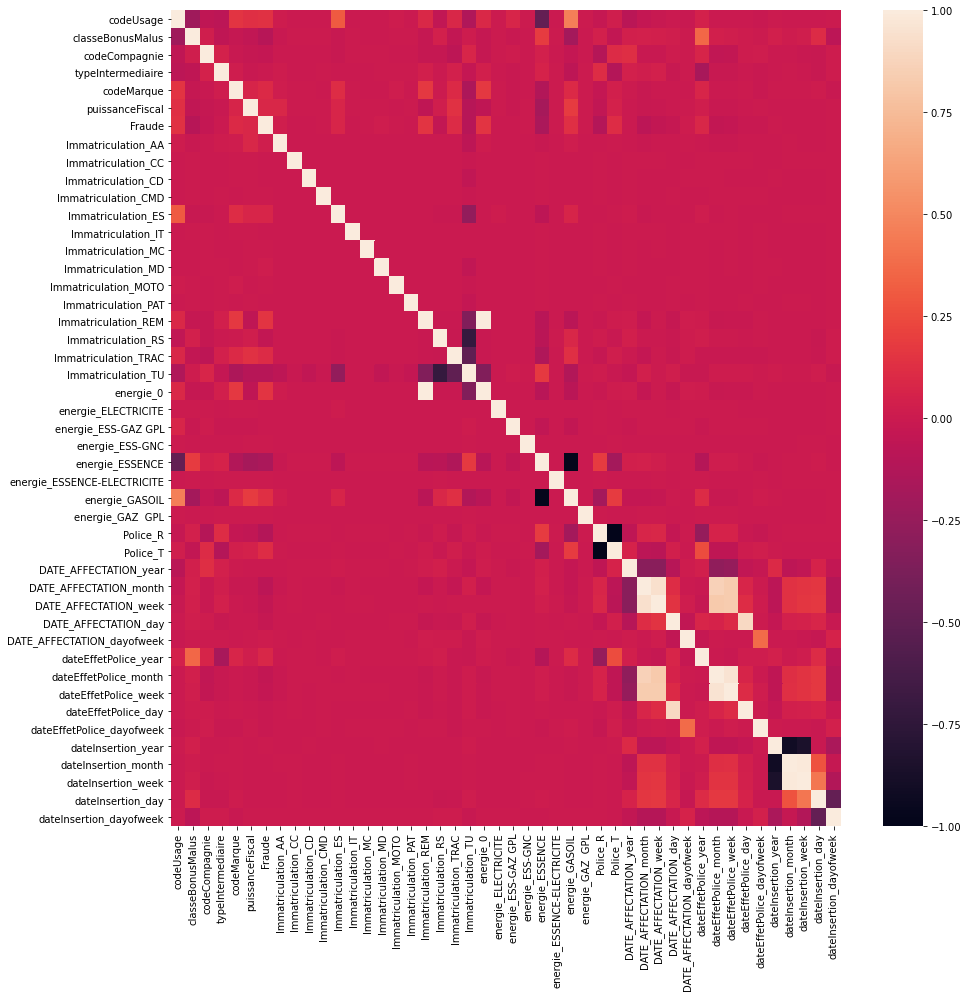

In [80]:
plt.figure(figsize=(15,15))
sns.heatmap(dfClassesBonusMalusIndivActif.corr())

<AxesSubplot:>

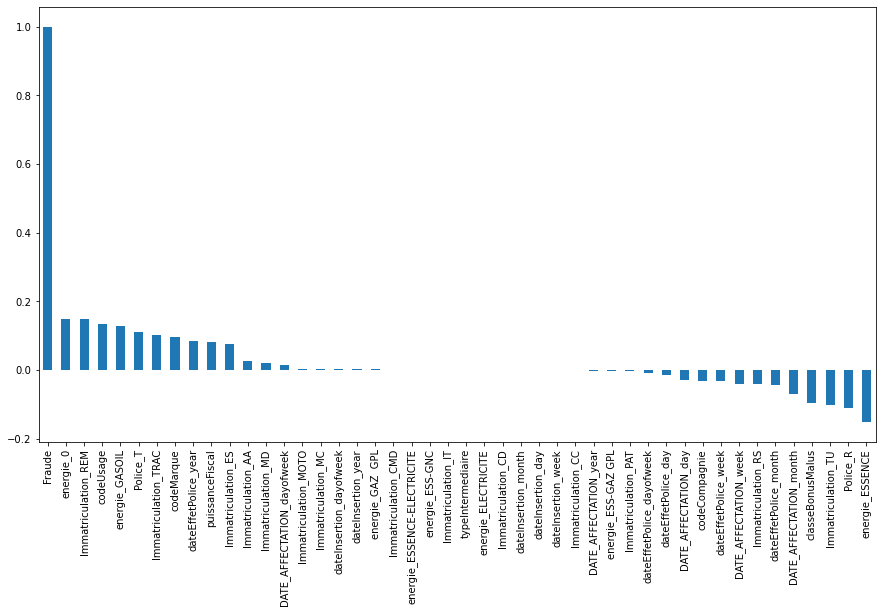

In [81]:
plt.figure(figsize=(15,8))
dfClassesBonusMalusIndivActif.corr()['Fraude'].sort_values(ascending = False).plot(kind='bar')

## Modeling Fraud

In [82]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [82]:
X=dfClassesBonusMalusIndivActif.drop('Fraude',axis=1)
y=dfClassesBonusMalusIndivActif.Fraude


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X.values,y.values, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape

((812764, 45), (203192, 45))

In [84]:
# data normalization with sklearn
#from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
#norm = MinMaxScaler().fit(X_train)

# transform training data
#X_train_norm = norm.transform(X_train)

# transform testing dataabs
#X_test_norm = norm.transform(X_test)

In [85]:
from xgboost import XGBClassifier

In [127]:
#fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# evaluate predictions
xgb=model.score(X_test, y_test)

C:\Users\Meriem\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:12:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [128]:
from sklearn.ensemble import AdaBoostClassifier
clff = AdaBoostClassifier(n_estimators=100, random_state=0)
clff.fit(X_train, y_train)
#clff.predict(X_test)
ada=clff.score(X_test, y_test)

In [88]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predictions_dt = decision_tree.predict(X_test)
acc_decision_tree = accuracy_score(y_test, predictions_dt)
acc_decision_tree

0.7465746682940273

In [126]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
depth = np.arange(1,30)
leaves = [1,2,4,5,10,20,30,40,80,100]
param_grid =[{'max_depth':depth,
             'min_samples_leaf':leaves}]
grid_search = RandomizedSearchCV(dtc, 
            param_distributions = param_grid,
            cv = 10,  
            n_iter = 5, # you want 5 here not 25 if I understand you correctly 
            scoring = 'accuracy', 
            error_score = 0, 
            verbose = 3, 
          n_jobs = -1)
grid_search = grid_search.fit(X_train,y_train)
al =grid_search.score(X_test, y_test)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.8min finished


In [91]:
import joblib
# save the model to disk
filename = 'finalized_model_Fraude.sav'
joblib.dump(acc_decision_tree, filename)

['finalized_model_Fraude.sav']

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


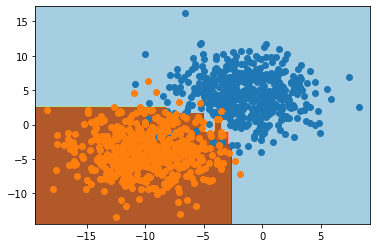

Decision Tree


In [125]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
# fit the model
grid_search.fit(X, y)
# make predictions for the grid
yhat = grid_search.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot

acc_decision_tree
pyplot.show()
print('Decision Tree')

C:\Users\Meriem\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:48:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost


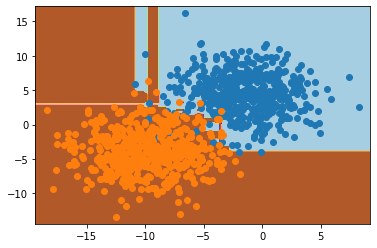

In [119]:
# generate dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model
model = XGBClassifier()
# fit the model
model.fit(X, y)
# make predictions for the grid
yhat = model.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
print('XGBoost')
pyplot.show()

AdaBoost


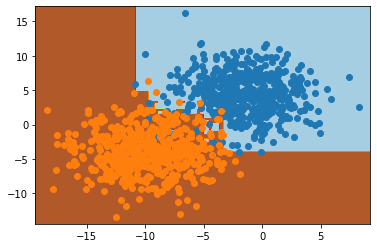

In [118]:
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=1, cluster_std=3)
# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
# define the x and y scale
x1grid = arange(min1, max1, 0.1)
x2grid = arange(min2, max2, 0.1)
# create all of the lines and rows of the grid
xx, yy = meshgrid(x1grid, x2grid)
# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
# horizontal stack vectors to create x1,x2 input for the model
grid = hstack((r1,r2))
# define the model

clff = AdaBoostClassifier(n_estimators=100, random_state=0)
# fit the model
clff.fit(X, y)
# make predictions for the grid
yhat = clff.predict(grid)
# reshape the predictions back into a grid
zz = yhat.reshape(xx.shape)
# plot the grid of x, y and z values as a surface
pyplot.contourf(xx, yy, zz, cmap='Paired')
# create scatter plot for samples from each class
for class_value in range(2):
	# get row indexes for samples with this class
	row_ix = where(y == class_value)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')
# show the plot
print('AdaBoost')
pyplot.show()


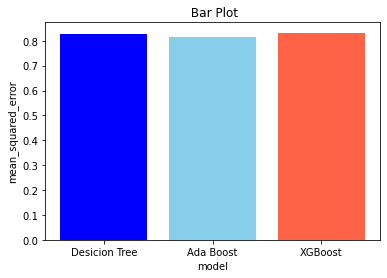

In [137]:
models= ['Desicion Tree','Ada Boost','XGBoost']
scores = [al, ada, xgb]
fig = plt.bar(models,scores,color=['blue', 'skyblue', 'tomato'])
plt.xlabel('model')
plt.ylabel("mean_squared_error")
plt.title(' Bar Plot')
plt.show()

In [138]:
models = pd.DataFrame({
    'Model': ['Desicion Tree',
              'Ada Boost',
              'XGBoost'],
    'Score': [al, ada, 
              xgb
             ]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,XGBoost,0.832361
0,Desicion Tree,0.829176
1,Ada Boost,0.813270


## classeBonusMalus classification

In [83]:
A=dfNonFraude.drop('classeBonusMalus',axis=1)
z=dfNonFraude.classeBonusMalus


In [231]:
X_train, X_test, y_train, y_test = train_test_split(A.values,z.values, test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape
X_train

array([[ 5.,  1.,  1., ..., 40.,  5.,  3.],
       [ 1., 14.,  1., ..., 40.,  5.,  3.],
       [ 1., 14.,  2., ..., 40.,  5.,  3.],
       ...,
       [ 1.,  1.,  1., ..., 40.,  5.,  3.],
       [ 1., 11.,  2., ..., 40.,  5.,  3.],
       [ 1.,  6.,  1., ..., 40.,  5.,  3.]])

In [177]:
from sklearn.tree import DecisionTreeClassifier

decision_treee = DecisionTreeClassifier()
decision_treee.fit(X_train, y_train)
predictions_dt = decision_treee.predict(X_test)
acc_decision_treee = accuracy_score(y_test, predictions_dt)
acc_decision_treee
#y_predd=decision_treee.predict(A)
#a=accuracy_score(z, y_predd)
#a

0.3944122344226742

In [162]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, GradientBoostingClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
predictions_rf = random_forest.predict(X_test)
print(random_forest.score(X_train, y_train))
acc_random_forest = accuracy_score(y_test, predictions_rf)
acc_random_forest

0.9014289531574303


0.4604624572000273

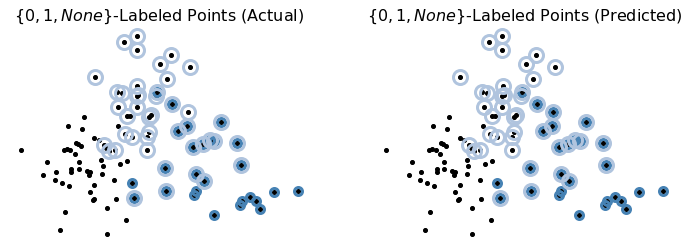

In [223]:
from sklearn.decomposition import PCA
trans = PCA(n_components=2)
X_trans = trans.fit_transform(M)

import matplotlib.pyplot as plt

where_0 = np.argwhere(y_pred[:, 0])
where_1 = np.argwhere(y_pred[:, 1])

fig, axarr = plt.subplots(1, 2, figsize=(12, 4))
axarr[1].plot(X_trans[:, 0], X_trans[:, 1], marker='o', linewidth=0, markersize=4, color='black')
axarr[1].plot(X_trans[where_0, 0], X_trans[where_0, 1], marker='o', linewidth=0, markeredgewidth=3, markersize=8, markeredgecolor='steelblue', fillstyle='none')
axarr[1].plot(X_trans[where_1, 0], X_trans[where_1, 1], marker='o', linewidth=0, markeredgewidth=3, markersize=14, markeredgecolor='lightsteelblue', fillstyle='none')
axarr[1].set_title("$\{0, 1, None\}$-Labeled Points (Predicted)", fontsize=16)
pass

where_0 = np.argwhere(L[:, 0])
where_1 = np.argwhere(L[:, 1])

axarr[0].plot(X_trans[:, 0], X_trans[:, 1], marker='o', linewidth=0, markersize=4, color='black')
axarr[0].plot(X_trans[where_0, 0], X_trans[where_0, 1], marker='o', linewidth=0, markeredgewidth=3, markersize=8, markeredgecolor='steelblue', fillstyle='none')
axarr[0].plot(X_trans[where_1, 0], X_trans[where_1, 1], marker='o', linewidth=0, markeredgewidth=3, markersize=14, markeredgecolor='lightsteelblue', fillstyle='none')
axarr[0].set_title("$\{0, 1, None\}$-Labeled Points (Actual)", fontsize=16)

axarr[0].axis('off')
axarr[1].axis('off')
pass

In [226]:
from sklearn.metrics import accuracy_score
accuracy_score(L, y_pred)

0.99